In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Standard normalization
])

train_dataset = datasets.ImageFolder('liver', transform=transform)
val_dataset = datasets.ImageFolder('liver', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [4]:
import torch
import torch.nn as nn
from torchvision import models

# Load pretrained ResNet-18
model = models.resnet18(pretrained=True)

# Modify the final fully connected layer for 5 classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)  # 5 output classes (F0–F4)


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\user/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:12<00:00, 3.75MB/s]


In [5]:
from torchvision import transforms

augment_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_preds = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = correct_preds / total

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")


Epoch [1/25], Loss: 1.3512, Accuracy: 0.0000
Epoch [2/25], Loss: 0.6514, Accuracy: 1.0000
Epoch [3/25], Loss: 0.2045, Accuracy: 1.0000
Epoch [4/25], Loss: 0.0522, Accuracy: 1.0000
Epoch [5/25], Loss: 0.0204, Accuracy: 1.0000
Epoch [6/25], Loss: 0.0096, Accuracy: 1.0000
Epoch [7/25], Loss: 0.0051, Accuracy: 1.0000
Epoch [8/25], Loss: 0.0030, Accuracy: 1.0000
Epoch [9/25], Loss: 0.0019, Accuracy: 1.0000
Epoch [10/25], Loss: 0.0013, Accuracy: 1.0000
Epoch [11/25], Loss: 0.0009, Accuracy: 1.0000
Epoch [12/25], Loss: 0.0006, Accuracy: 1.0000
Epoch [13/25], Loss: 0.0005, Accuracy: 1.0000
Epoch [14/25], Loss: 0.0004, Accuracy: 1.0000
Epoch [15/25], Loss: 0.0003, Accuracy: 1.0000
Epoch [16/25], Loss: 0.0002, Accuracy: 1.0000
Epoch [17/25], Loss: 0.0002, Accuracy: 1.0000
Epoch [18/25], Loss: 0.0002, Accuracy: 1.0000
Epoch [19/25], Loss: 0.0001, Accuracy: 1.0000
Epoch [20/25], Loss: 0.0001, Accuracy: 1.0000
Epoch [21/25], Loss: 0.0001, Accuracy: 1.0000
Epoch [22/25], Loss: 0.0001, Accuracy: 1.00


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


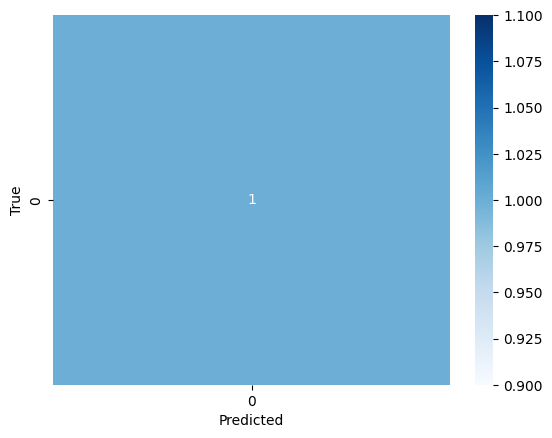

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate(model, loader):
    model.eval()
    true_labels = []
    pred_labels = []
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(predicted.cpu().numpy())

    return confusion_matrix(true_labels, pred_labels)

cm = evaluate(model, val_loader)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Epoch [1/25], Train Loss: 0.0001, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [2/25], Train Loss: 0.0001, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [3/25], Train Loss: 0.0001, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [4/25], Train Loss: 0.0001, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [5/25], Train Loss: 0.0001, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [6/25], Train Loss: 0.0000, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [7/25], Train Loss: 0.0000, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [8/25], Train Loss: 0.0000, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [9/25], Train Loss: 0.0000, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [10/25], Train Loss: 0.0000, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [11/25], Train Loss: 0.0000, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [12/25], Train Loss: 0.0000, Train Accuracy: 1

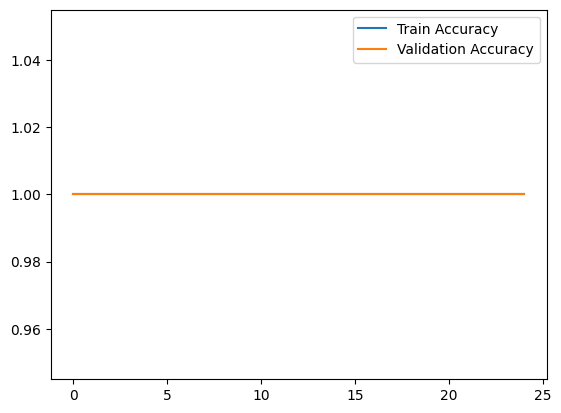

In [9]:
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    correct_preds = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Compute accuracy
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = correct_preds / total
    train_loss = running_loss / total

    # Validation phase
    model.eval()
    val_correct_preds = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            val_correct_preds += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct_preds / val_total

    # Append accuracies for plotting later
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, "
          f"Validation Accuracy: {val_acc:.4f}")

# Plot training and validation accuracy
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.legend()
plt.show()


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/25], Train Loss: 1.4355, Train Accuracy: 0.0000, Validation Accuracy: 1.0000
Epoch [2/25], Train Loss: 0.7361, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [3/25], Train Loss: 0.2451, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [4/25], Train Loss: 0.0621, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [5/25], Train Loss: 0.0241, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [6/25], Train Loss: 0.0112, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [7/25], Train Loss: 0.0060, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [8/25], Train Loss: 0.0035, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [9/25], Train Loss: 0.0022, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [10/25], Train Loss: 0.0015, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [11/25], Train Loss: 0.0010, Train Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch [12/25], Train Loss: 0.0007, Train Accuracy: 1

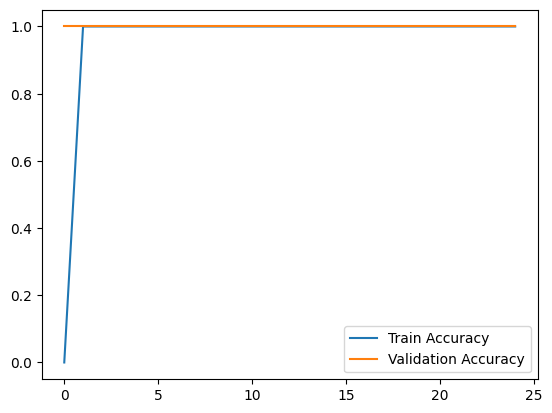

Model saved to liver_fibrosis_model.pkl


In [11]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import pickle
import matplotlib.pyplot as plt

# Data transforms for training and validation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Standard normalization
])

# Load the dataset
train_dataset = datasets.ImageFolder('liver', transform=transform)
val_dataset = datasets.ImageFolder('liver', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load the pretrained ResNet-18 model
model = models.resnet18(pretrained=True)

# Modify the final layer to have 5 output classes (for F0-F4 fibrosis stages)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)

# Use CrossEntropyLoss and Adam optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Training the model
num_epochs = 25
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    correct_preds = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Compute accuracy
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = correct_preds / total
    train_loss = running_loss / total

    # Validation phase
    model.eval()
    val_correct_preds = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            val_correct_preds += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct_preds / val_total

    # Append accuracies for plotting later
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, "
          f"Validation Accuracy: {val_acc:.4f}")

# Plot training and validation accuracy
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.legend()
plt.show()

# Save the trained model as a .pkl file
model_filename = "liver_fibrosis_model.pkl"

# Save the model using pickle
with open(model_filename, 'wb') as f:
    pickle.dump(model, f)

print(f"Model saved to {model_filename}")


In [12]:
with open('liver_fibrosis_model.pkl', 'rb') as f:
    model = pickle.load(f)
